In [3]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\samhe\OneDrive\Desktop\crop prediction and production\FAOSTAT_data.xlsx"  # Update path if needed
xls = pd.ExcelFile(file_path)

# Load the first sheet
df = xls.parse(xls.sheet_names[0])  # You can also specify the sheet name directly

# Drop unnecessary columns
columns_to_drop = [
    'Domain Code', 'Element Code', 'Item Code (CPC)', 'Year Code',
    'Flag', 'Flag Description', 'Note'
]
df_cleaned = df.drop(columns=columns_to_drop)

# Rename columns for clarity
df_cleaned = df_cleaned.rename(columns={
    'Domain': 'Category',
    'Area Code (M49)': 'Area Code',
    'Area': 'Country',
    'Element': 'Metric',
    'Item': 'Item',
    'Year': 'Year',
    'Unit': 'Unit',
    'Value': 'Value'
})

# Convert data types
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned['Value'] = pd.to_numeric(df_cleaned['Value'], errors='coerce')

# Save cleaned data to CSV
df_cleaned.to_csv('FAOSTAT_data_cleaned.csv', index=False)

print("Cleaned dataset saved as 'FAOSTAT_data_cleaned.csv'")


Cleaned dataset saved as 'FAOSTAT_data_cleaned.csv'


In [9]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import mysql.connector
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password=""
)

In [10]:
mycursor = mydb.cursor(buffered=True)

In [12]:
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('birds_species',)
('cric',)
('crop_prediction_and_production',)
('information_schema',)
('medics',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('police',)
('qwe',)
('rin',)
('tennis_analytics',)
('test',)


In [11]:
mycursor.execute("CREATE DATABASE crop_prediction_and_production")


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv("FAOSTAT_data_cleaned.csv")

# Preview data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


                       Category  Area Code      Country          Metric  \
0  Crops and livestock products          4  Afghanistan  Area harvested   
1  Crops and livestock products          4  Afghanistan           Yield   
2  Crops and livestock products          4  Afghanistan      Production   
3  Crops and livestock products          4  Afghanistan  Area harvested   
4  Crops and livestock products          4  Afghanistan           Yield   

                Item  Year   Unit    Value  
0  Almonds, in shell  2019     ha  29203.0  
1  Almonds, in shell  2019  kg/ha   1308.3  
2  Almonds, in shell  2019      t  38205.0  
3  Almonds, in shell  2020     ha  22134.0  
4  Almonds, in shell  2020  kg/ha   1775.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Category   224647 non-null  object 
 1   Area Code  224647 non-null  int64  
 2   

In [14]:
# Pivot the data to wide format
df_pivot = df.pivot_table(index=['Country', 'Item', 'Year'],
                          columns='Metric',
                          values='Value',
                          aggfunc='first').reset_index()

# Remove index name
df_pivot.columns.name = None

# Display the first few rows
print(df_pivot.head())


       Country               Item  Year  Area harvested  Laying  Milk Animals  \
0  Afghanistan  Almonds, in shell  2019         29203.0     NaN           NaN   
1  Afghanistan  Almonds, in shell  2020         22134.0     NaN           NaN   
2  Afghanistan  Almonds, in shell  2021         36862.0     NaN           NaN   
3  Afghanistan  Almonds, in shell  2022         36462.0     NaN           NaN   
4  Afghanistan  Almonds, in shell  2023         37000.0     NaN           NaN   

   Producing Animals/Slaughtered  Production  Stocks   Yield  \
0                            NaN     38205.0     NaN  1308.3   
1                            NaN     39307.0     NaN  1775.9   
2                            NaN     64256.0     NaN  1743.2   
3                            NaN     63515.0     NaN  1742.0   
4                            NaN     67000.0     NaN  1810.8   

   Yield/Carcass Weight  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN 

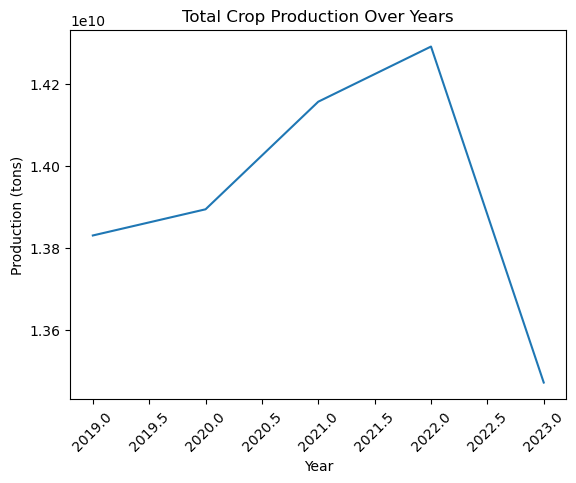

In [18]:
#Total Production Over Time
import matplotlib.pyplot as plt
import seaborn as sns

prod_trend = df_pivot.groupby('Year')['Production'].sum().reset_index()

sns.lineplot(data=prod_trend, x='Year', y='Production')
plt.title("Total Crop Production Over Years")
plt.ylabel("Production (tons)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()


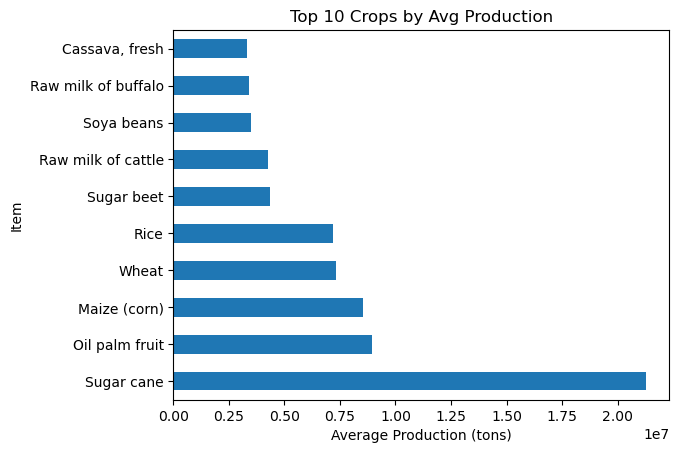

In [19]:
# Top Crops by Average Production
top_crops = df_pivot.groupby('Item')['Production'].mean().sort_values(ascending=False).head(10)

top_crops.plot(kind='barh', title='Top 10 Crops by Avg Production')
plt.xlabel('Average Production (tons)')
plt.show()


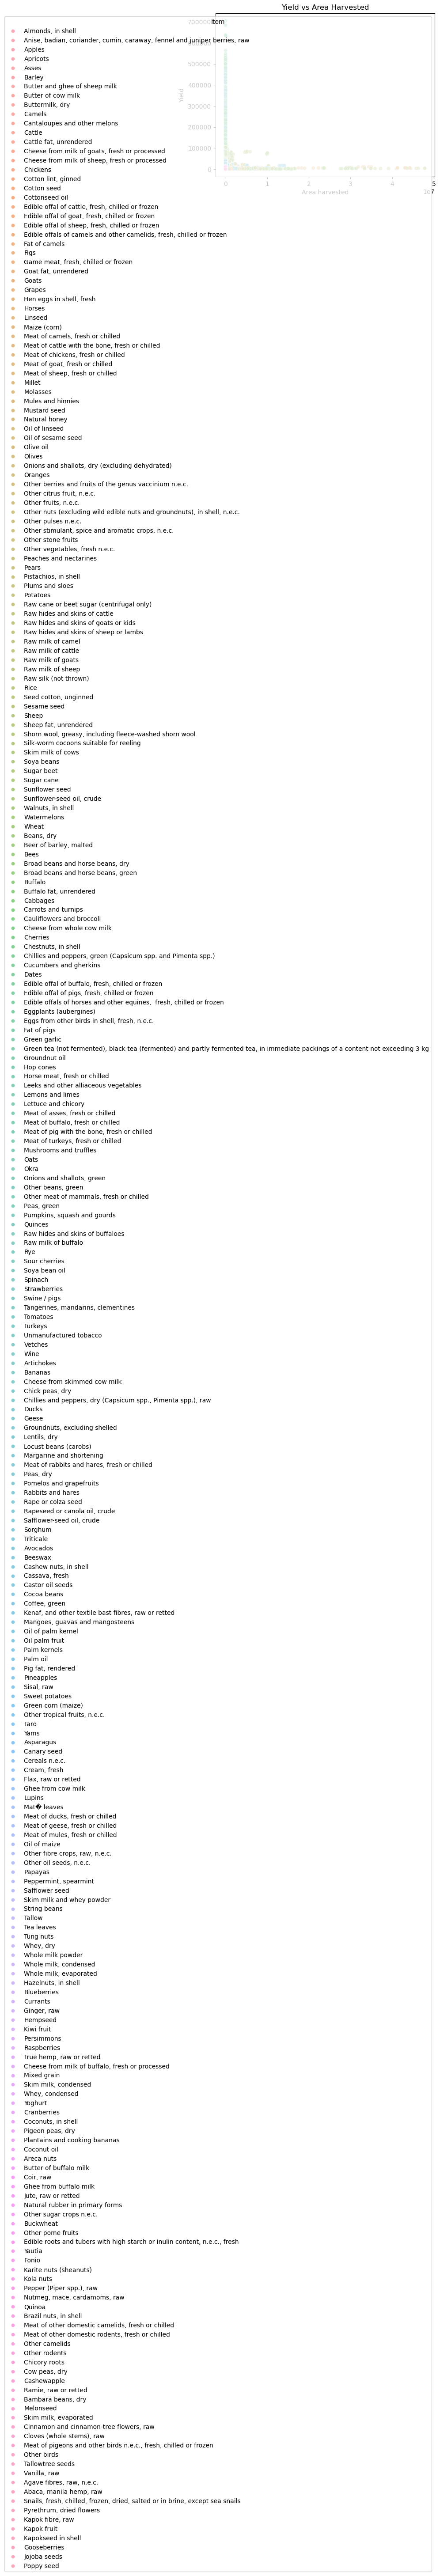

In [20]:
#Yield vs Area Harvested
sns.scatterplot(data=df_pivot, x='Area harvested', y='Yield', hue='Item', alpha=0.6)
plt.title("Yield vs Area Harvested")
plt.show()


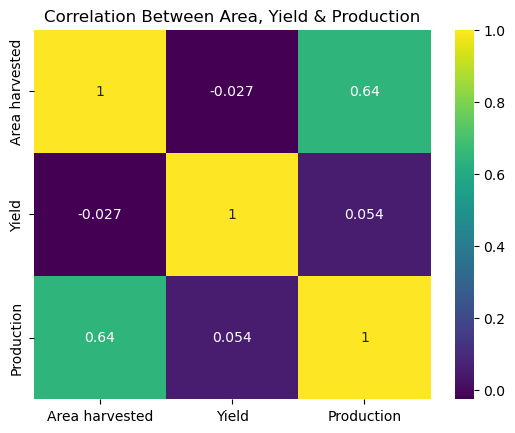

In [21]:
#Correlation Heatmap
sns.heatmap(df_pivot[['Area harvested', 'Yield', 'Production']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Between Area, Yield & Production")
plt.show()


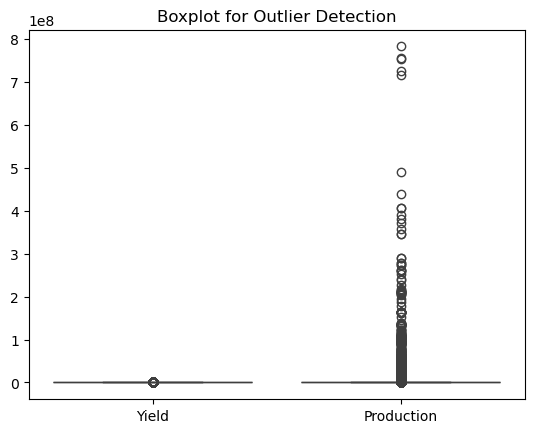

In [22]:
#Detect Outliers
sns.boxplot(data=df_pivot[['Yield', 'Production']])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [14]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.7 MB/s eta 0:00:41
    --------------------------------------- 2.1/150.0 MB 4.9 MB/s eta 0:00:31
    --------------------------------------- 3.1/150.0 MB 5.0 MB/s eta 0:00:30
   - -------------------------------------- 4.7/150.0 MB 5.6 MB/s eta 0:00:26
   - -------------------------------------- 5.8/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 7.1/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 8.1/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 8.9/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 10.2/150.0 MB 5.4 MB/s eta 0:00:26
   --- ----

In [15]:
# Model performance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
import pandas as pd
import mysql.connector

# Load your cleaned data
df = pd.read_csv("FAOSTAT_data_cleaned.csv")

# Establish connection to MySQL/phpMyAdmin
conn = mysql.connector.connect(
    host="localhost",           # Change if phpMyAdmin is on a different host
    user="root",       # e.g., 'root'
    password="",   # e.g., ''
    database="crop_prediction_and_production"    # Make sure this DB exists in phpMyAdmin
)

cursor = conn.cursor()

# Create table if not exists
create_table_query = """
CREATE TABLE IF NOT EXISTS crop_data (
    Category VARCHAR(100),
    Area_Code INT,
    Country VARCHAR(100),
    Metric VARCHAR(100),
    Item VARCHAR(100),
    Year INT,
    Unit VARCHAR(50),
    Value FLOAT
);
"""
cursor.execute(create_table_query)

# Insert each row
insert_query = """
INSERT INTO crop_data (Category, Area_Code, Country, Metric, Item, Year, Unit, Value)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
"""

for _, row in df.iterrows():
    values = (
        row['Category'], row['Area Code'], row['Country'], row['Metric'],
        row['Item'], int(row['Year']), row['Unit'], row['Value']
    )
    cursor.execute(insert_query, values)

# Commit and close
conn.commit()
cursor.close()
conn.close()

print("Data uploaded to phpMyAdmin/MySQL successfully!")


Data uploaded to phpMyAdmin/MySQL successfully!


In [20]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("FAOSTAT_data_cleaned.csv")

# Pivot the data
df_pivot = df.pivot_table(index=['Country', 'Item', 'Year'],
                          columns='Metric',
                          values='Value',
                          aggfunc='first').reset_index()

# Remove index name if present
df_pivot.columns.name = None


In [21]:
# Remove rows with missing values
df_model = df_pivot.dropna(subset=['Area harvested', 'Yield', 'Production'])

X = df_model[['Area harvested', 'Yield']]
y = df_model['Production']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#Train Models & Evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MSE": round(mse, 2),
        "MAE": round(mae, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)



               Model  R² Score           MSE         MAE
0  Linear Regression    0.3953  8.144303e+13  1100901.62
1      Random Forest    0.9980  2.757252e+11    38294.32
2            XGBoost    0.9726  3.687389e+12   115348.13
